In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the feature engineered data from data/processed/feature_engineered_data.xlsx
data = pd.read_excel('../data/processed/feature_engineered_data.xlsx')

In [4]:
#get data head
data.head().T

,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,Yes,Yes,Yes
Tenure Months,2,2,8,28,49
Phone Service,Yes,Yes,Yes,Yes,Yes
Multiple Lines,No,No,Yes,Yes,Yes
Internet Service,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic
Online Security,Yes,No,No,No,No
Online Backup,Yes,No,No,No,Yes


In [5]:
#get count of unique values in each column
data.nunique()

Gender                        2
Senior Citizen                2
Partner                       2
Dependents                    2
Tenure Months                73
Phone Service                 2
Multiple Lines                2
Internet Service              3
Online Security               2
Online Backup                 2
Device Protection             2
Tech Support                  2
Streaming TV                  2
Streaming Movies              2
Contract                      3
Paperless Billing             2
Payment Method                4
Monthly Charges            1585
Total Charges              6531
Churn Value                   2
CLTV                       3438
Tenure Bucket                 6
Total Add-On Services         7
Digital Security Bundle       2
Auto Payment                  2
CLTV Bucket                   2
dtype: int64

In [6]:
#seperate target, binary, categorical and numerical columns
target_col = 'Churn Value'
binary_cols = [col for col in data.columns if data[col].nunique() == 2 and col != target_col]
categorical_cols = [col for col in data.columns if 2 < data[col].nunique() < 7]
numerical_cols = [col for col in data.columns if data[col].nunique() >= 7]

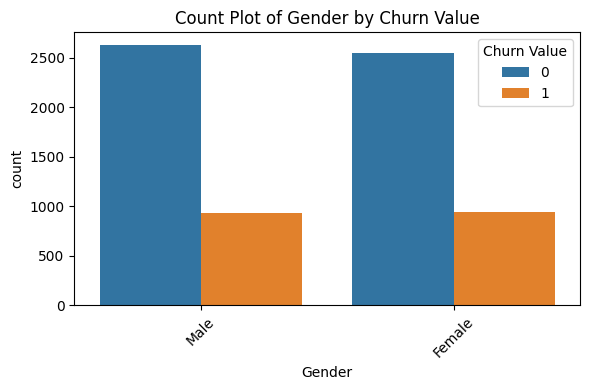

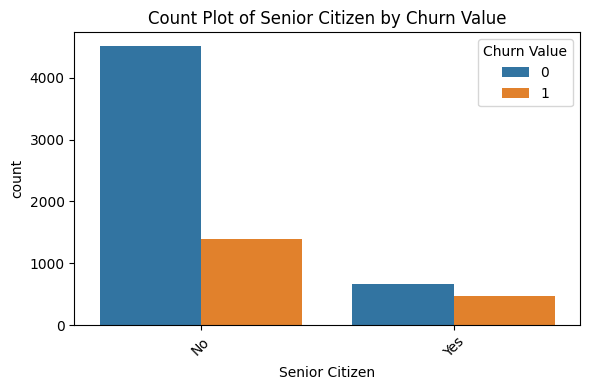

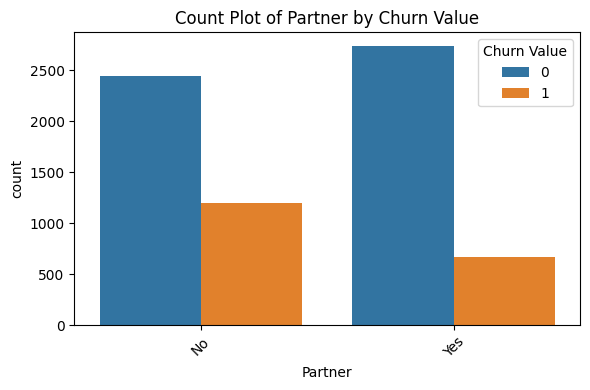

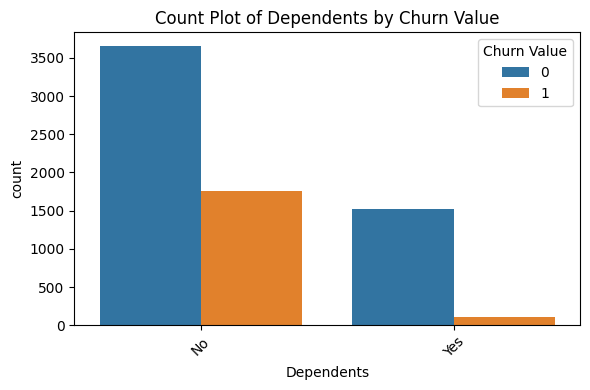

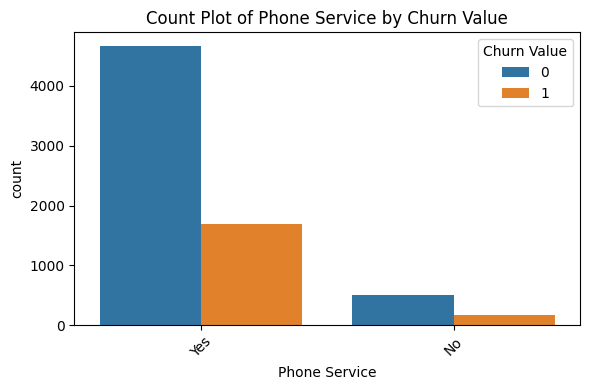

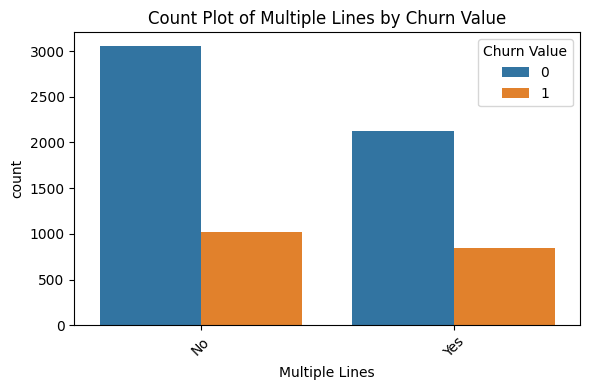

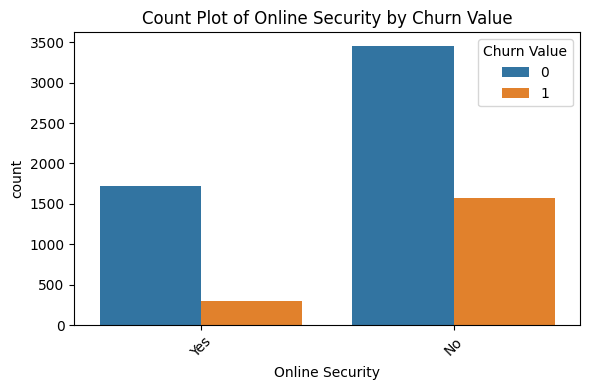

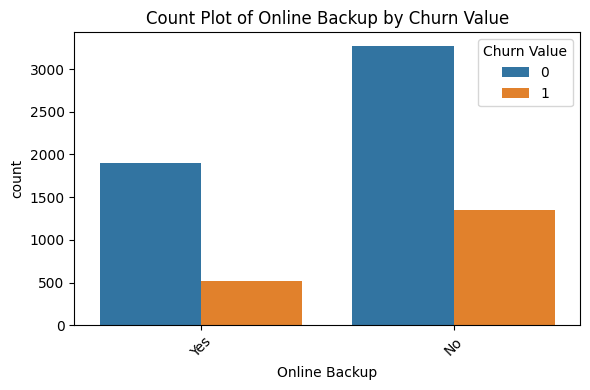

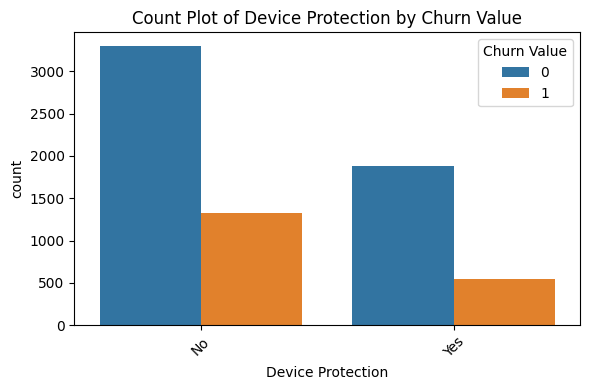

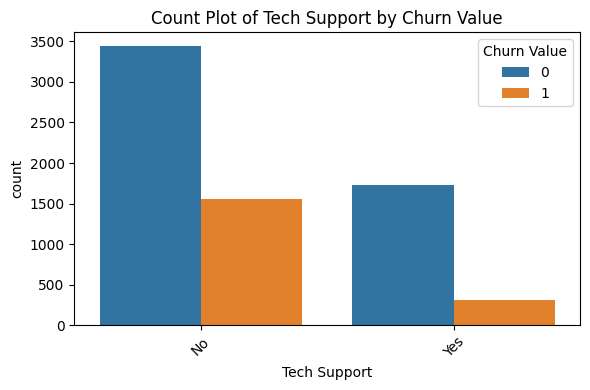

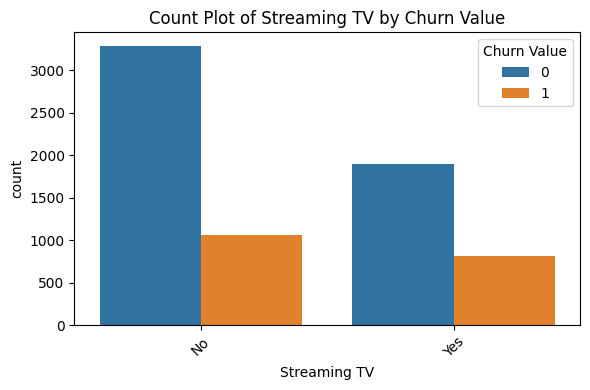

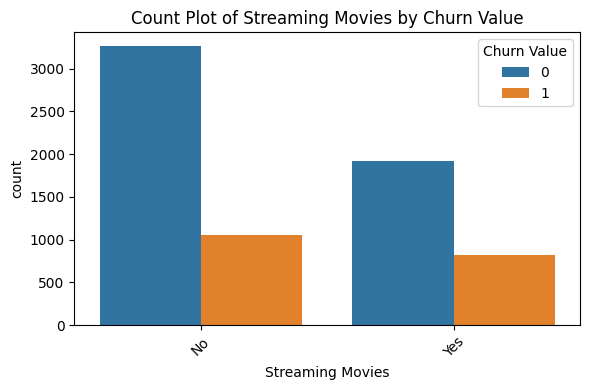

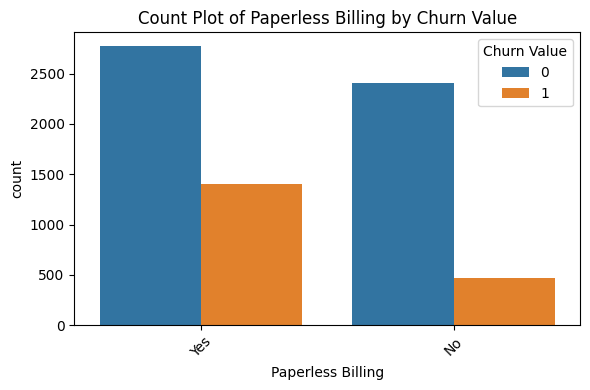

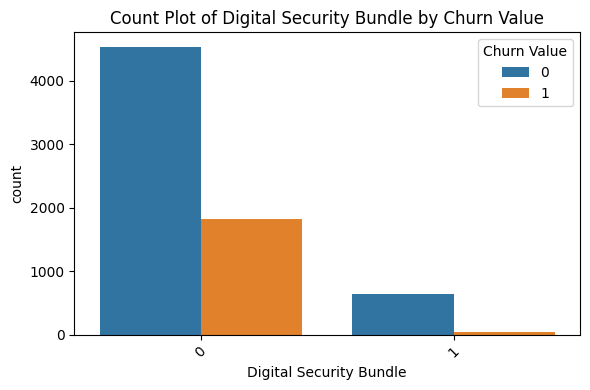

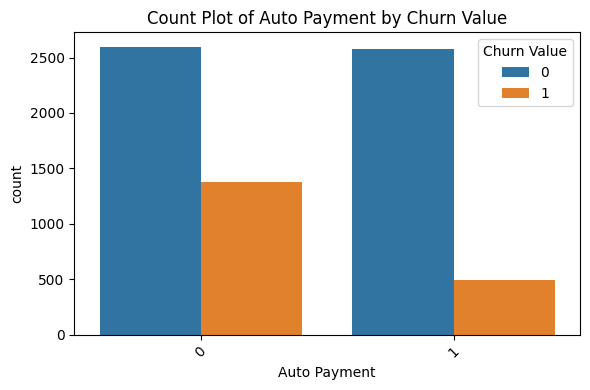

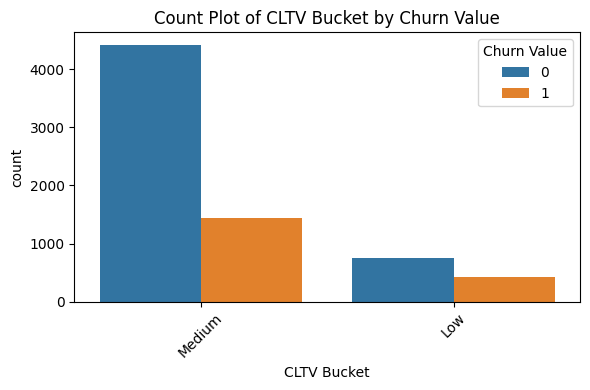

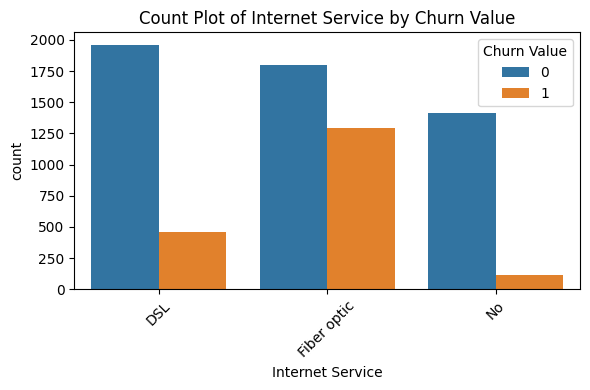

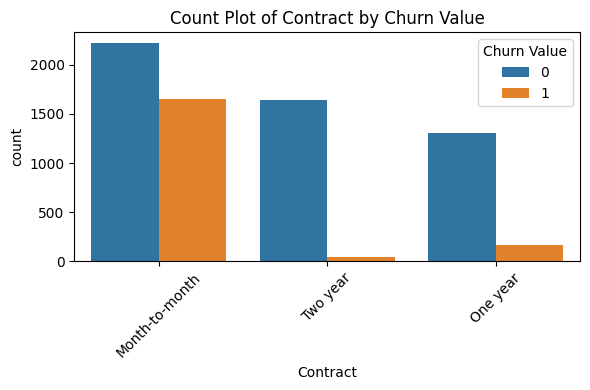

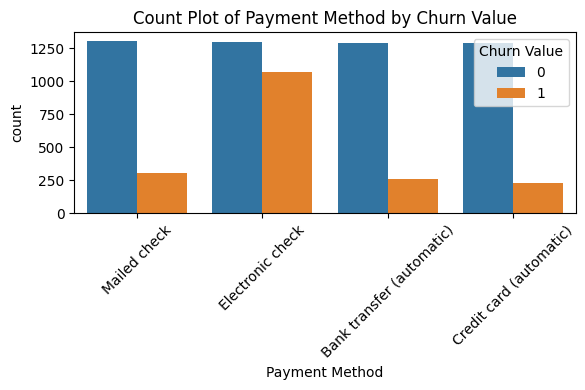

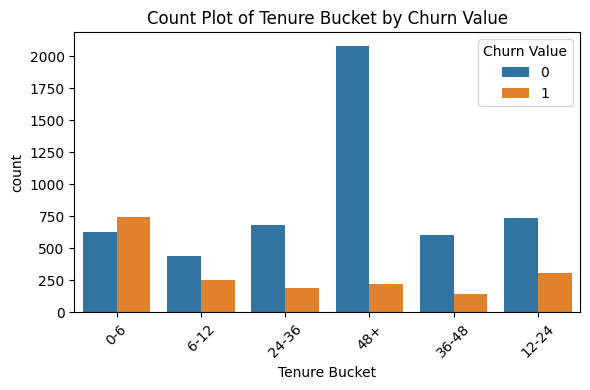

In [9]:
#create count plots for binary and categorical columns
for col in binary_cols + categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, hue=target_col)
    plt.title(f'Count Plot of {col} by {target_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
#get churn rate for each category for each binary and categorical column
for col in binary_cols + categorical_cols:
    churn_rate = data.groupby(col)[target_col].mean()
    print(f'Churn Rate by {col}:\n{churn_rate}\n')

Churn Rate by Gender:
Gender
Female    0.269209
Male      0.261603
Name: Churn Value, dtype: float64

Churn Rate by Senior Citizen:
Senior Citizen
No     0.236062
Yes    0.416813
Name: Churn Value, dtype: float64

Churn Rate by Partner:
Partner
No     0.329580
Yes    0.196649
Name: Churn Value, dtype: float64

Churn Rate by Dependents:
Dependents
No     0.325517
Yes    0.065151
Name: Churn Value, dtype: float64

Churn Rate by Phone Service:
Phone Service
No     0.249267
Yes    0.267096
Name: Churn Value, dtype: float64

Churn Rate by Multiple Lines:
Multiple Lines
No     0.250246
Yes    0.286099
Name: Churn Value, dtype: float64

Churn Rate by Online Security:
Online Security
No     0.313296
Yes    0.146112
Name: Churn Value, dtype: float64

Churn Rate by Online Backup:
Online Backup
No     0.291721
Yes    0.215315
Name: Churn Value, dtype: float64

Churn Rate by Device Protection:
Device Protection
No     0.286518
Yes    0.225021
Name: Churn Value, dtype: float64

Churn Rate by Tech S

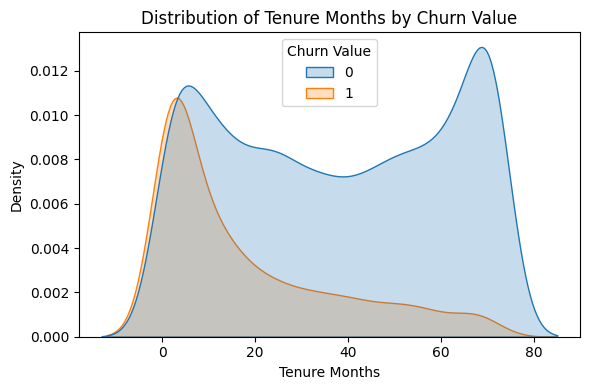

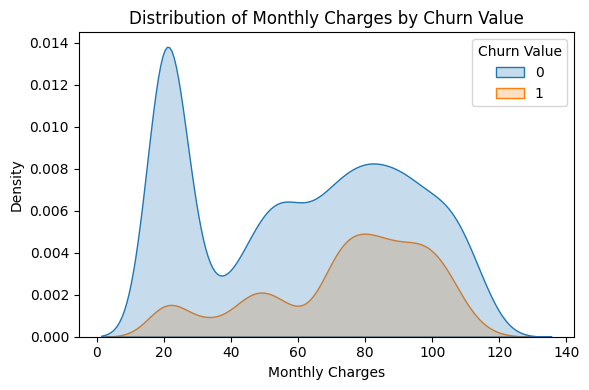

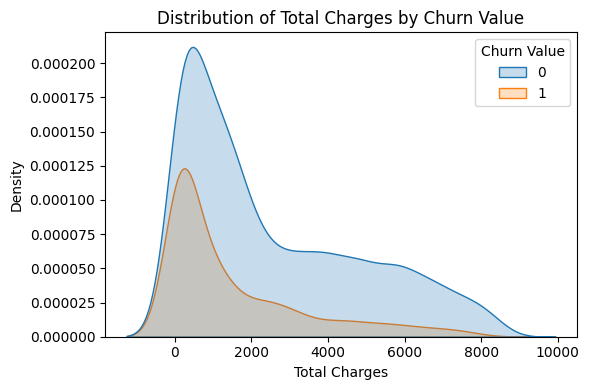

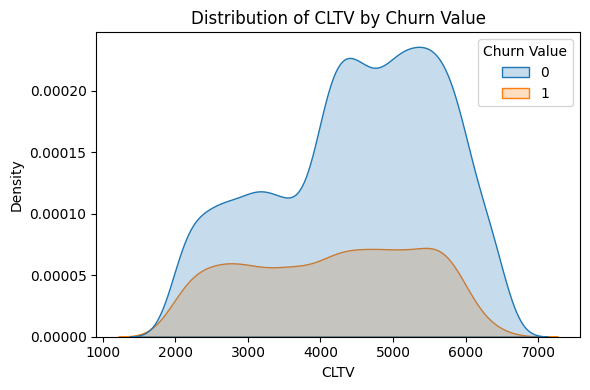

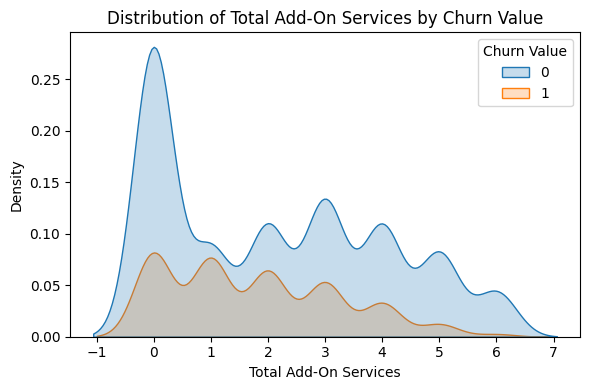

In [12]:
#create line plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data, x=col, hue=target_col, fill=True)
    plt.title(f'Distribution of {col} by {target_col}')
    plt.tight_layout()
    plt.show()

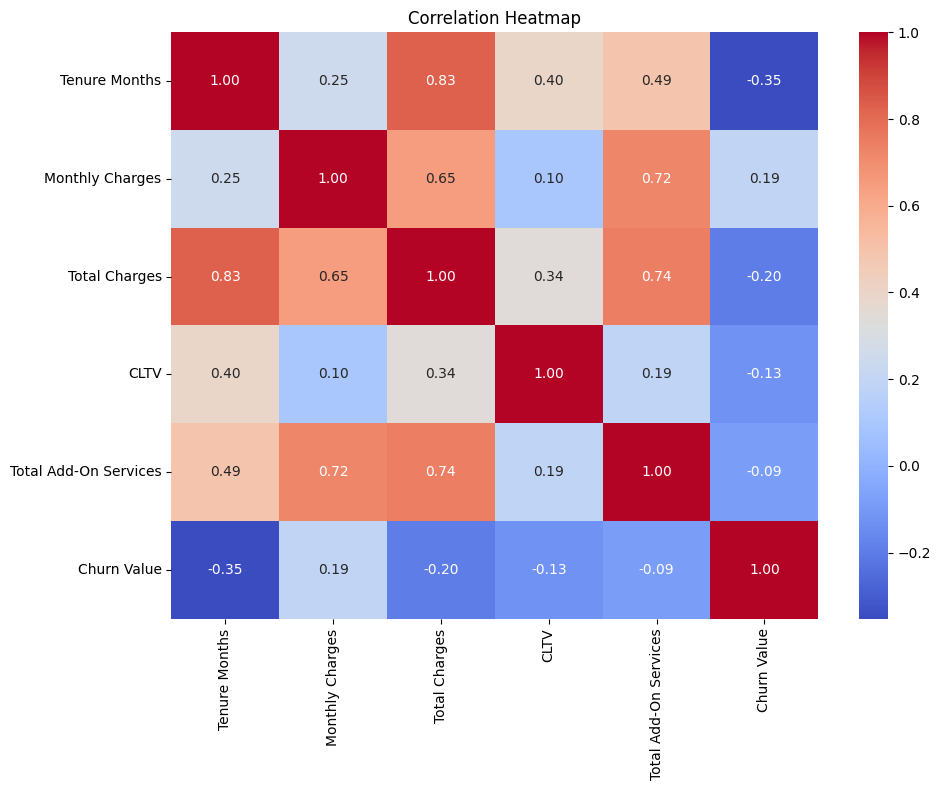

In [13]:
#create heatmap for correlation of numerical columns + target column
plt.figure(figsize=(10,8))
corr = data[numerical_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()